# Prueba de bondad de ajuste

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from fitter import Fitter, get_common_distributions

## Ejercicio 8-88

Se observa y se anota la duracion en segundos que tarda un programa en ejecutarse.

In [2]:
tiempos = [
	(2.10, 16),
	(2.11, 28),
	(2.12, 41),
	(2.13, 74),
	(2.14, 149),
	(2.15, 256),
	(2.16, 137),
	(2.17, 82),
	(2.18, 40),
	(2.19, 19),
	(2.20, 11),
]

a) La distribucion normal parece ser un modelo de probabilidad razonable para la duracion de la ejecucion? Utilize $\alpha$ = 0.05
<br>
b) Encuentre el P-valor de esta prueba.

In [3]:
tiempos_des = []
for tupla in tiempos:
	for _ in range(tupla[1]):
		tiempos_des.append(tupla[0])
tiempos = tiempos_des
del tiempos_des

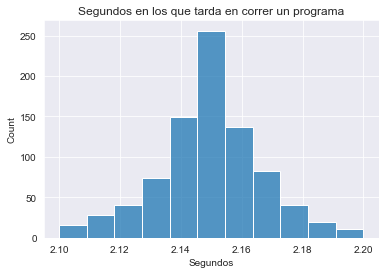

In [4]:
sns.set_style('darkgrid')
sns.histplot(tiempos, bins = 'sturges')
plt.xlabel('Segundos')
plt.title('Segundos en los que tarda en correr un programa')
plt.show()

In [5]:
n = len(tiempos)
media = np.mean(tiempos)
desv = np.std(tiempos)
n, media, desv

(853, 2.1492966002344667, 0.018945778130164553)

In [6]:
intervalo = np.arange(min(tiempos) + 0.005, max(tiempos), 0.010)
intervalo = intervalo.tolist()
intervalo.insert(0, -np.inf)
intervalo.append(np.inf)
intervalo

[-inf,
 2.105,
 2.1149999999999998,
 2.1249999999999996,
 2.1349999999999993,
 2.144999999999999,
 2.154999999999999,
 2.1649999999999987,
 2.1749999999999985,
 2.1849999999999983,
 2.194999999999998,
 inf]

In [7]:
df = pd.DataFrame({'lim_inf': intervalo[:-1], 'lim_sup': intervalo[1:]})
df

,lim_inf,lim_sup
0,-inf,2.105
1,2.105,2.115
2,2.115,2.125
3,2.125,2.135
4,2.135,2.145
5,2.145,2.155
6,2.155,2.165
7,2.165,2.175
8,2.175,2.185
9,2.185,2.195


In [8]:
df['oi'] = df.apply(lambda i: sum([i['lim_inf'] <= x < i['lim_sup'] for x in sorted(tiempos)]), axis = 1)
df

,lim_inf,lim_sup,oi
0,-inf,2.105,16
1,2.105,2.115,28
2,2.115,2.125,41
3,2.125,2.135,74
4,2.135,2.145,149
5,2.145,2.155,256
6,2.155,2.165,137
7,2.165,2.175,82
8,2.175,2.185,40
9,2.185,2.195,19


Para sacar la probabilidad de una distribucion normal, primero hay que sacar *"la ultima letra"*
<br>
$Z = \frac{x - \mu}{\sigma}$
<br>
Ya con esto podemos sacar la probabilidad en base a lo que obtuvimos en *Z*
<br>
$P(Z \le Z_{li})$
<br>
Pero como aqui son intervalos hay que hacerlo asi:
<br>
$P(li \le x < ls) = P(Z_{li} \le Z < Z_{ls})$
<br>
que puede sacarse como la resta de dos probabilidades
<br>
$p_{i} = P(Z < Z_{ls}) - P(Z \le Z_{li})$
<br>
Y para el ultimo intervalo
<br>
$1 - P(Z > Z_{li})$
<br>

In [9]:
def sacar_z(x):
	return (x - media) / desv

def sacar_p(i):
	zi = sacar_z(i['lim_inf'])
	zs = sacar_z(i['lim_sup'])
	# si es el primer renglon
	if i['lim_inf'] == -np.inf:
		p = st.norm.cdf(zs)
	# si es el ultimo renglon
	elif i['lim_sup'] == np.inf:
		p = st.norm.sf(zi)
	else:
		p = st.norm.cdf(zs) - st.norm.cdf(zi)
	return p

df['z_inf'] = df.apply(lambda i: sacar_z(i['lim_inf']), axis = 1)
df['z_sup'] = df.apply(lambda i: sacar_z(i['lim_sup']), axis = 1)
df['p'] = df.apply(lambda i: sacar_p(i), axis = 1)
df

,lim_inf,lim_sup,oi,z_inf,z_sup,p
0,-inf,2.105,16,-inf,-2.338072,0.009692
1,2.105,2.115,28,-2.338072,-1.810250,0.025437
2,2.115,2.125,41,-1.810250,-1.282428,0.064718
3,2.125,2.135,74,-1.282428,-0.754606,0.125396
4,2.135,2.145,149,-0.754606,-0.226784,0.185053
5,2.145,2.155,256,-0.226784,0.301038,0.208011
6,2.155,2.165,137,0.301038,0.828860,0.178101
7,2.165,2.175,82,0.828860,1.356682,0.116151
8,2.175,2.185,40,1.356682,1.884504,0.057693
9,2.185,2.195,19,1.884504,2.412326,0.021823


In [10]:
df['p'].sum()

1.0

In [11]:
df['ei'] = n * df['p']
df

,lim_inf,lim_sup,oi,z_inf,z_sup,p,ei
0,-inf,2.105,16,-inf,-2.338072,0.009692,8.267060
1,2.105,2.115,28,-2.338072,-1.810250,0.025437,21.697543
2,2.115,2.125,41,-1.810250,-1.282428,0.064718,55.204237
3,2.125,2.135,74,-1.282428,-0.754606,0.125396,106.963160
4,2.135,2.145,149,-0.754606,-0.226784,0.185053,157.850346
5,2.145,2.155,256,-0.226784,0.301038,0.208011,177.433740
6,2.155,2.165,137,0.301038,0.828860,0.178101,151.920121
7,2.165,2.175,82,0.828860,1.356682,0.116151,99.076528
8,2.175,2.185,40,1.356682,1.884504,0.057693,49.211880
9,2.185,2.195,19,1.884504,2.412326,0.021823,18.614896


In [12]:
df['x2_calc'] = df.apply(lambda x: (x['oi'] - x['ei']) ** 2 / x['ei'], axis = 1)
df

,lim_inf,lim_sup,oi,z_inf,z_sup,p,ei,x2_calc
0,-inf,2.105,16,-inf,-2.338072,0.009692,8.267060,7.233327
1,2.105,2.115,28,-2.338072,-1.810250,0.025437,21.697543,1.830667
2,2.115,2.125,41,-1.810250,-1.282428,0.064718,55.204237,3.654798
3,2.125,2.135,74,-1.282428,-0.754606,0.125396,106.963160,10.158356
4,2.135,2.145,149,-0.754606,-0.226784,0.185053,157.850346,0.496221
5,2.145,2.155,256,-0.226784,0.301038,0.208011,177.433740,34.788520
6,2.155,2.165,137,0.301038,0.828860,0.178101,151.920121,1.465310
7,2.165,2.175,82,0.828860,1.356682,0.116151,99.076528,2.943258
8,2.175,2.185,40,1.356682,1.884504,0.057693,49.211880,1.724355
9,2.185,2.195,19,1.884504,2.412326,0.021823,18.614896,0.007967


In [13]:
x2_calc = df['x2_calc'].sum()
x2_calc

66.96138264511359

In [14]:
alfa = 0.05
k = len(df['oi'])  # renglones
p = 2  # parametros
gl = k - p - 1
x2_crit = st.chi2.isf(alfa, gl)
x2_crit

15.507313055865454

In [15]:
if x2_calc >= x2_crit:
	print('H0 SI se rechaza')
else:
	print('H0 NO se rechaza')

H0 SI se rechaza


Al 5% de significancia existe suficiente evidencia que permite decir que los tiempos no se distribuyen normalmente

P-valor

In [16]:
st.chi2.sf(x2_calc, gl)

1.973389267739124e-11

## Grafica de probabilidad

In [17]:
d = {'j': [], 'xj': [], 'fa': [], '100fa': [], 'zj': []}
for j, xj in enumerate(sorted(tiempos)):
	fa = ((j + 1) - 0.5) / n
	cien_fa = 100 * fa
	zj = st.norm.ppf(fa)
	d['j'].append(j + 1)
	d['xj'].append(xj)
	d['fa'].append(fa)
	d['100fa'].append(cien_fa)
	d['zj'].append(zj)
tabla = pd.DataFrame(d).set_index('j')
tabla

,xj,fa,100fa,zj
j,,,,
1,2.1,0.000586,0.058617,-3.245527
2,2.1,0.001758,0.175850,-2.918518
3,2.1,0.002931,0.293083,-2.755421
4,2.1,0.004103,0.410317,-2.643461
5,2.1,0.005275,0.527550,-2.557228
...,...,...,...,...
849,2.2,0.994725,99.472450,2.557228
850,2.2,0.995897,99.589683,2.643461
851,2.2,0.997069,99.706917,2.755421


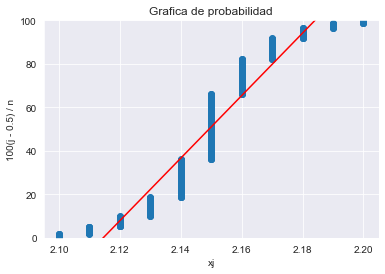

In [18]:
x = tabla['xj']
y = tabla['100fa']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r-')

plt.title('Grafica de probabilidad')
plt.xlabel('xj')
plt.ylabel('100(j - 0.5) / n')
plt.ylim(0, 100)
plt.show()

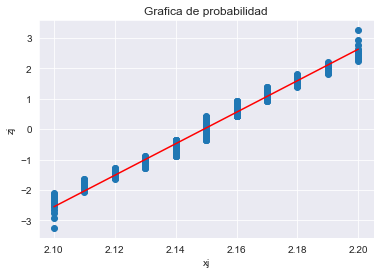

In [19]:
x = tabla['xj']
y = tabla['zj']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r-')

plt.title('Grafica de probabilidad')
plt.xlabel('xj')
plt.ylabel('zj')
plt.show()

<AxesSubplot:xlabel='xj', ylabel='zj'>

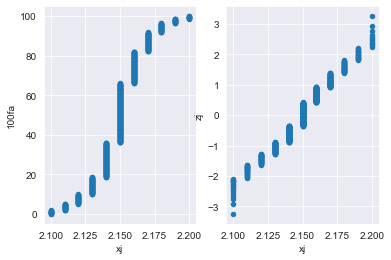

In [20]:
figure, axs = plt.subplots(1, 2, sharex = True)
tabla.plot(kind = 'scatter', x = 'xj', y = '100fa', ax = axs[0])
tabla.plot(kind = 'scatter', x = 'xj', y = 'zj', ax = axs[1])

## Ver que distribucion tiene

Como no es una distribucion normal, veamos a que distribucion probabilistica se ajusta mas

,sumsquare_error,aic,bic,kl_div
cauchy,152502.631158,-319.691246,4437.306996,inf
lognorm,153870.281202,-370.723175,4451.671397,inf
norm,153871.092272,-373.169045,4444.927134,inf
gamma,153890.920911,-372.010934,4451.785809,inf
rayleigh,153957.280208,inf,4445.404792,inf


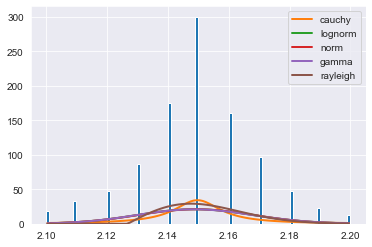

In [21]:
f = Fitter(tiempos, distributions = get_common_distributions())
f.fit()
f.summary()

Los resultados nos dieron las mejores distribuciones a las que se ajustan mas en base a la suma de los errores de los cuadrados (`sumsquare_error`).
Resulta que los tiempos siguen una [distribucion cauchy](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Cauchy).

Vamos a comparar la distribucion normal con la de cauchy.

,sumsquare_error,aic,bic,kl_div
cauchy,152502.631158,-319.691246,4437.306996,inf
norm,153871.092272,-373.169045,4444.927134,inf


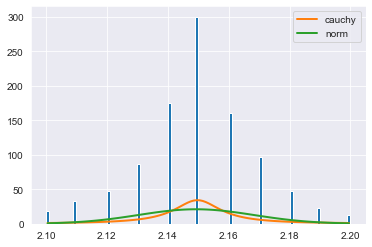

In [26]:
f = Fitter(tiempos, distributions = ['cauchy', 'norm'])
f.fit()
f.summary()

Al parecer la distribucion cauchy tiene una curtosis mas leptocurtica que la normal

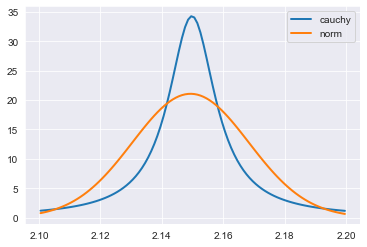

In [27]:
f.plot_pdf()

In [28]:
mejor = f.get_best()
best_name = list(mejor.keys())[0]
print('Distribucion mejor ajustada:', best_name.upper())
print(mejor[best_name])

Distribucion mejor ajustada: CAUCHY
{'loc': 2.149740441294707, 'scale': 0.009288357747063864}


Si evaluamos todas las distribuciones que puedan existir

C:\Users\pmz94\Desktop\data-science\venv\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\pmz94\Desktop\data-science\venv\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
gennorm,139011.557494,-306.208881,4365.046824,inf
dweibull,145028.056365,-343.895996,4401.188553,inf
dgamma,145220.354319,-302.797945,4402.318827,inf
laplace_asymmetric,150840.320807,-347.583919,4434.706832,inf
loglaplace,150859.150718,-347.874401,4434.813309,inf


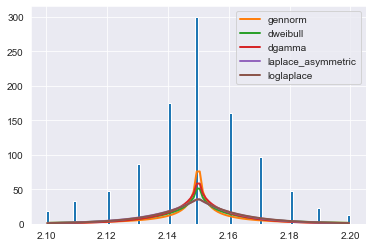

In [29]:
f = Fitter(tiempos, timeout = 60)
# tomara un buen rato porque por default, se prueban todas las distribuciones
f.fit()
f.summary()

En este caso resulta que los tiempos siguen una [distribucion normal generalizada](https://hmong.es/wiki/Generalized_normal_distribution#:~:text=La%20distribuci%C3%B3n%20normal%20generalizada%20o,forma%20a%20la%20distribuci%C3%B3n%20normal%20.).

Vamos a comparar la distribucion normal con la normal generalizada.

,sumsquare_error,aic,bic,kl_div
norm,1.538711e+05,-373.169045,4444.927134,inf
gennorm,inf,inf,inf,inf


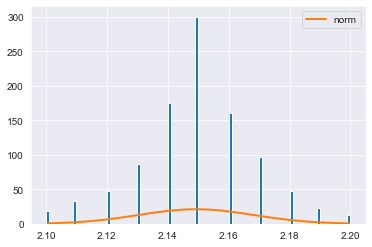

In [33]:
f = Fitter(tiempos, distributions = ['gennorm', 'norm'], timeout = 60)
f.fit()
f.summary()

La distribucion normal generalizada tambien es mas leptocurtica que la normal

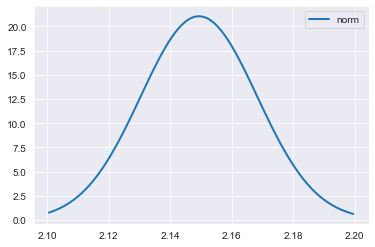

In [31]:
f.plot_pdf()

In [32]:
mejor = f.get_best()
best_name = list(mejor.keys())[0]
print('Distribucion mejor ajustada:', best_name.upper())
print(mejor[best_name])

Distribucion mejor ajustada: NORM
{'loc': 2.1492966002344667, 'scale': 0.018945778130164553}


De estas dos distribuciones, a cual se ajusta mas?

In [ ]:
f = Fitter(tiempos, distributions = ['cauchy', 'gennorm'])
f.fit()
f.summary()
f.plot_pdf()
mejor = f.get_best()
best_name = list(mejor.keys())[0]
print('Distribucion mejor ajustada:', best_name.upper())
print(mejor[best_name])